# PyBer Ride Sharing Analysis and Visualization

In [142]:
#Dependencies and File Paths
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#File Paths
ride_data_path = "Data/ride_data.csv"
city_data_path = "Data/city_data.csv"

#Read file(s)

ride_data_df = pd.read_csv(ride_data_path)
city_data_df = pd.read_csv(city_data_path)



In [143]:
#Preview DataFrames: Print the heads of both DataFrames

print(ride_data_df.head())
print(city_data_df.head())

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


In [144]:
#Merge DataFrames: Merge on 'city' column

merged_data = pd.merge(ride_data_df,city_data_df,on="city", how="left")
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Share Data (by City type)

### Calculations for Bubble Plot

In [145]:
#Create DataFrames for each City Type

urban_cities = merged_data[merged_data["type"] == "Urban"].groupby("city")
suburban_cities = merged_data[merged_data["type"] == "Suburban"].groupby("city")
rural_cities = merged_data[merged_data["type"] == "Rural"].groupby("city")

In [146]:
#Calcuations for Urban Cities: Ride Count, Average Fare, Average Driver Count (for size)

x_urban = urban_cities["ride_id"].count()
y_urban = urban_cities["fare"].mean()
s_urban = urban_cities["driver_count"].mean()

In [147]:
#Calcuations for Sub-Urban Cities: Ride Count, Average Fare, Average Driver Count (for size)

x_suburban = suburban_cities["ride_id"].count()
y_suburban = suburban_cities["fare"].mean()
s_suburban = suburban_cities["driver_count"].mean()


In [148]:
#Calcuations for Rural Cities: Ride Count, Average Fare, Average Driver Count (for size)

x_rural = rural_cities["ride_id"].count()
y_rural=  rural_cities["fare"].mean()
s_rural = rural_cities["driver_count"].mean()

### Bubble Plot Settings

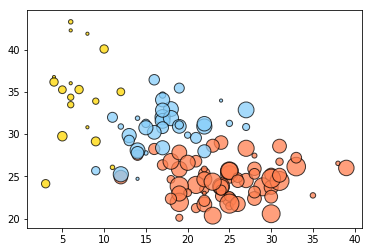

In [149]:
#Scatter Plots for each City type

plt.scatter(x_urban, y_urban, label="Urban", s=s_urban * 5, color=["coral"], edgecolor="black",alpha=0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label="Suburban", s=s_suburban * 10, color=["lightskyblue"], edgecolor="black",alpha=0.75, marker="o")
plt.scatter(x_rural, y_rural, label="Rural", s=s_rural * 10, color=["gold"], edgecolor="black",alpha=0.75, marker="o")